<a href="https://colab.research.google.com/github/Aurelio-Naufal/UTS-Datmin-Data/blob/main/UTS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Import Data dari Github
# Data telah dilakukan modifikasi sedikit, pada entri 111 ke bawah data di hapus karena merupakan missing value
urldata = 'https://raw.githubusercontent.com/Aurelio-Naufal/UTS-Datmin/main/Copy%20of%20CaseStudy-AlumniData%20-%20CaseStudy-AlumniData.csv'
df = pd.read_csv(urldata)

#### Data Understanding
Variabel-Variabelnya :
* Alumni ID
* Timestamp
* Tahun Masuk
* Tahun Wisuda
* Status saat ini
* Waktu Mendapatkan Pekerjaan
* Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika
* Posisi anda saat ini di tempat bekerja saat Ini
* Nama Universitas dan Kota tempat melanjutkan Studi setelah S1
* Nama jurusan/program studi setelah S1	Tahun saudara mulai berwirausaha
* Bidang wirausaha
* Kesesuaian Kurikulum
* Kesesuaian Bidang Ilmu
* Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah)


In [ ]:
# Preview Data
df.head()

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004,2010,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3,3,4.0
1,2,7/26/2023 10:10,2015,2020,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3,3,6.0
2,3,7/28/2023 2:00,2000,2006,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5,5,5.0
3,4,7/27/2023 14:27,2014,2019,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3,3,8.0
4,5,7/25/2023 9:44,2013,2018,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4,3,15.0


## PreProcessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Alumni-ID                                                                                     110 non-null    int64  
 1   Timestamp                                                                                     110 non-null    object 
 2   Tahun Masuk                                                                                   110 non-null    int64  
 3   Tahun Wisuda                                                                                  110 non-null    int64  
 4   Status saat ini:                                                                              110 non-null    object 
 5   Waktu Mendapatkan Pekerjaan: 

In [ ]:
# Cek Missing Value
df.isna().sum()

Alumni-ID                                                                                        0
Timestamp                                                                                        0
Tahun Masuk                                                                                      0
Tahun Wisuda                                                                                     0
Status saat ini:                                                                                 0
Waktu Mendapatkan Pekerjaan:                                                                     0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    86
Posisi anda saat ini di tempat bekerja saat Ini:                                                26
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   86
Nama jurusan/program studi setelah S1                                                           86
Tahun saud

Telihat bahwa terdapat banyak missing value pada beberapa variabel tersebut, sehingga untuk mendapatkan insight yang maksimal, variabel-variabel yang memiliki missing value tersebut akan dihindari dalam proses pencarian insight

Kemudian, karena pada beberapa variabel yang mempunyai data type objek seharusnya kategorik, maka akan diubah

In [ ]:
df["Status saat ini:"] = df["Status saat ini:"].astype("category")
df["Waktu Mendapatkan Pekerjaan:"] = df["Waktu Mendapatkan Pekerjaan:"].astype("category")

In [ ]:
#Cek Statistika Deskriptif
df.describe(include ="all")

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
count,110.000000,110,110.000000,110.000000,110,110,24,84,24,24,13,12,110.000000,110.000000,66.000000
unique,NaN,102,NaN,NaN,11,7,14,73,17,15,6,7,NaN,NaN,NaN
top,NaN,7/27/2023 20:48,NaN,NaN,Karyawan Swasta,Kurang dari 3 bulan.,-,Dosen,-,-,-,-,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,70,60,6,4,6,6,6,6,NaN,NaN,NaN
mean,55.500000,NaN,2014.081818,2018.927273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.872727,3.563636,7.646212
std,31.898276,NaN,4.854076,4.948745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879002,1.045105,8.999497
min,1.000000,NaN,2000.000000,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,28.250000,NaN,2011.250000,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,4.125000
50%,55.500000,NaN,2016.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,6.000000
75%,82.750000,NaN,2017.000000,2022.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,7.000000


## EDA

<ipython-input-36-9c31b36031a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


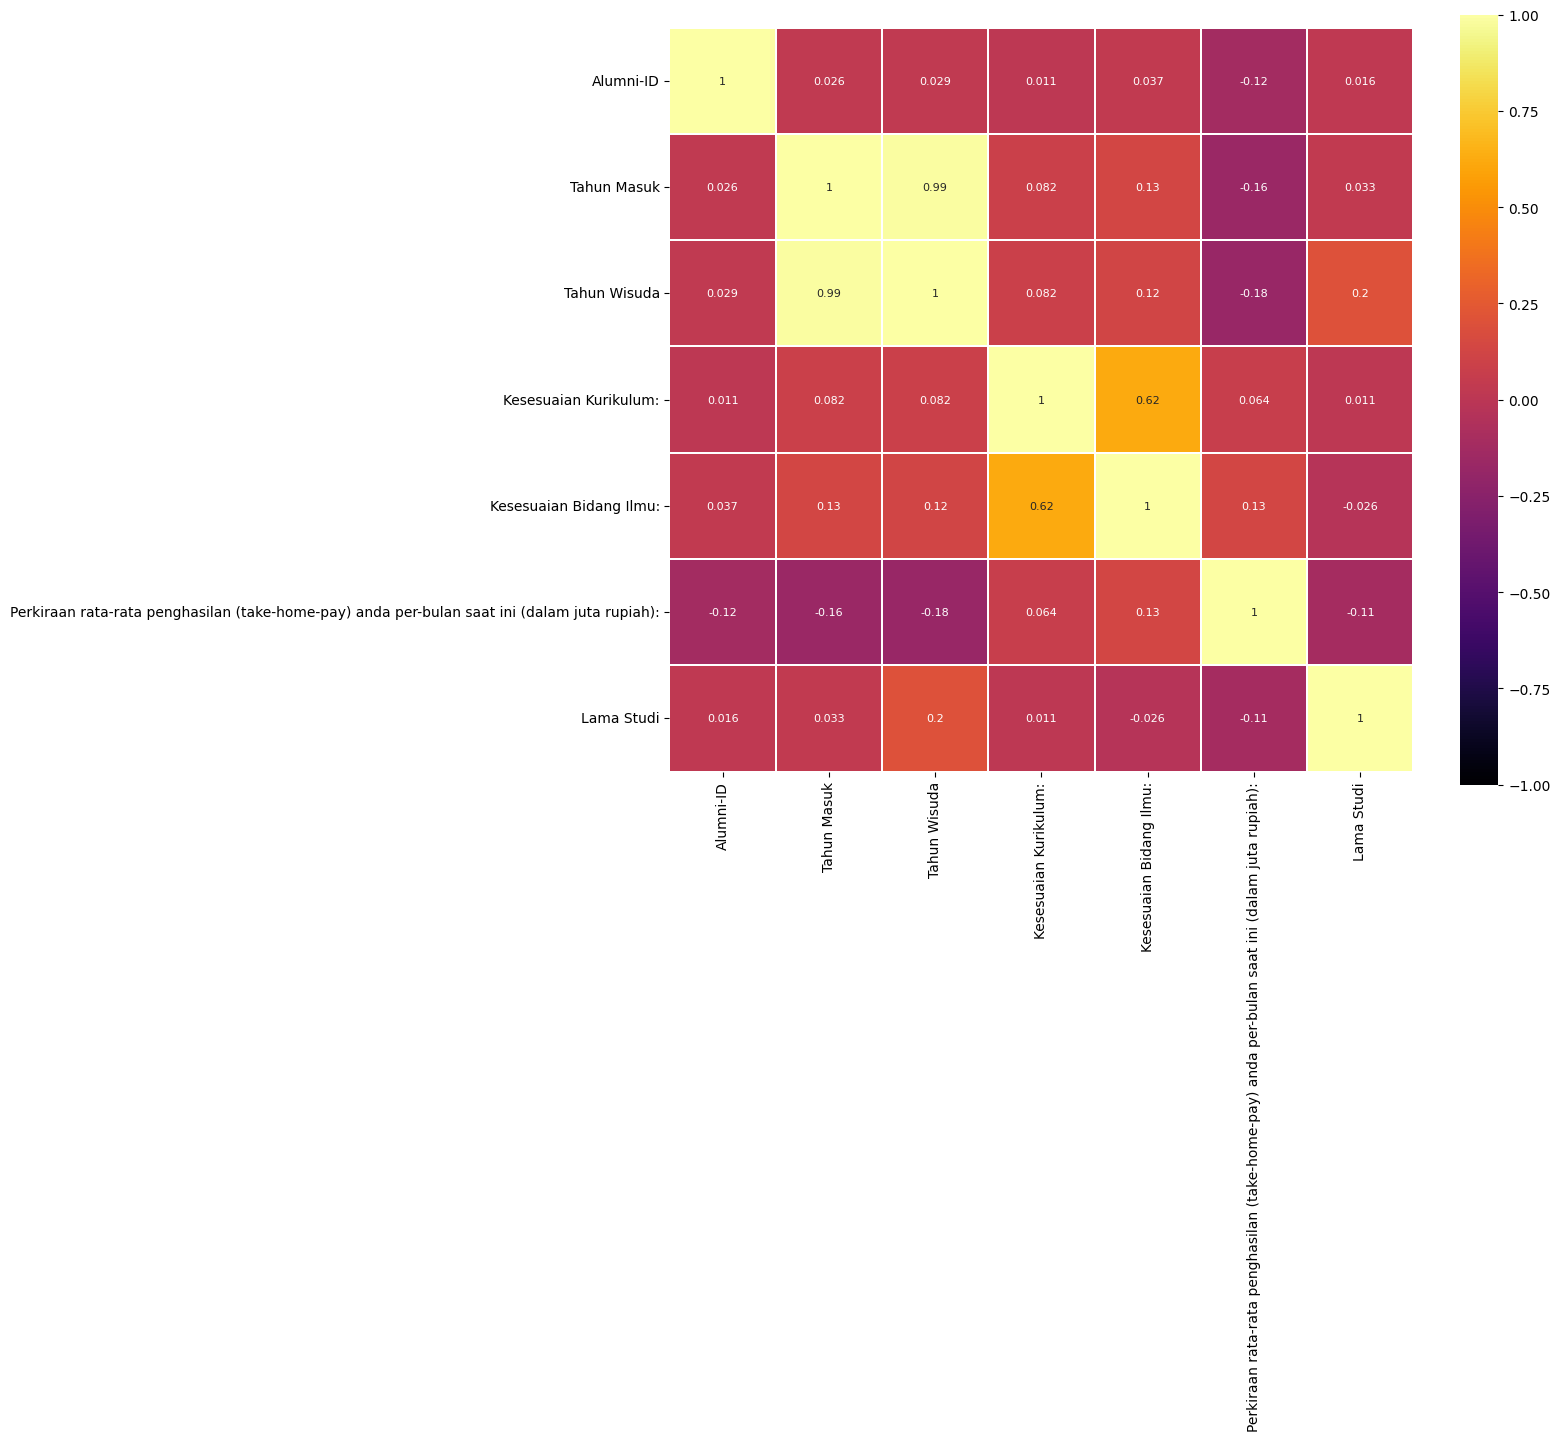

In [ ]:
# Cek Korelasi
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
 cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True);

Diperoleh terdapat korelasi yang cukup signifikan antara Kesesuaian bidang ilmu dan Kesesuaiain kurikulum, Selain itu korelasi yang sangat tinggi juga didapatkan pada tahun masuk dan tahun wisuda dimana hal ini dapat diexpect (masuk akal, karena rata-rata kuliah 4-6 tahun)

## Insight 1
Analisis Hubungan antara Lama Studi(Kuliah) dengan Perkiraan Penghasilan

In [ ]:
# Akan dibuat variabel baru yakni Lama Studi yang terbuat dari Tahun Wisuda dikurang Tahun Masuk
df["Lama Studi"]= df["Tahun Wisuda"] - df["Tahun Masuk"]
df["Lama Studi"].head()

0    6
1    5
2    6
3    5
4    5
Name: Lama Studi, dtype: int64

In [ ]:
df['Lama Studi'].describe()

count    110.000000
mean       4.845455
std        0.814844
min        4.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: Lama Studi, dtype: float64

Rata-rata alumni lulus dalam waktu 4.8 tahun, atau berada di antara 4 dan 5 tahun

In [ ]:
# Selanjutnya akan dicek korelasinya dengan perkiraan penghasilan

<ipython-input-44-41ede2721282>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  p1 = sns.catplot(data=df, x='Lama Studi',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')


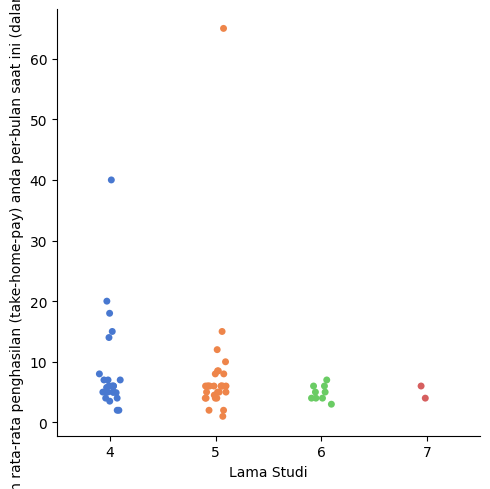

In [ ]:
p1 = sns.catplot(data=df, x='Lama Studi',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')

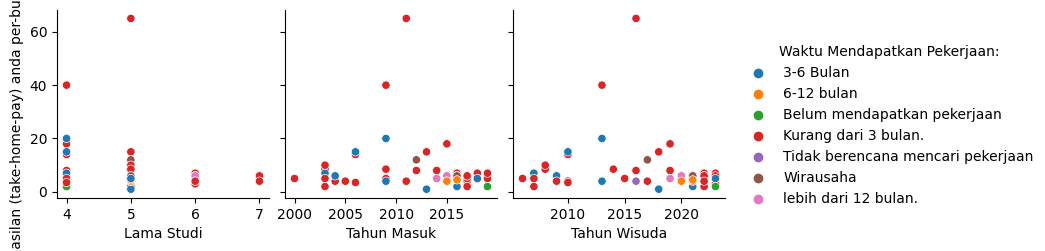

In [ ]:
# Cek Pairplot
p = sns.pairplot(data =df,
                 x_vars=['Lama Studi','Tahun Masuk', 'Tahun Wisuda'],
                 y_vars=['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'],
                 hue = "Waktu Mendapatkan Pekerjaan:")

Dapat dilihat bahwa Lama Studi dibawah 5 tahun cenderung mendapatkan perkiraan penghasilan yang lebih tinggi dibanding yang lulusnya 6 tahun ke atas. Kemudian dapat dilihat juga bahwa tidak terdapat pengaruh antara tahun masuk dan wisuda terhadap rata-rata perkiraan penghasilan karena dalam plot tetap konstan (pengecualian adanya outlier)

In [ ]:
# Cek korelasi
import scipy.stats
df["Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):"].corr(df["Lama Studi"])

-0.11432441581428764

In [ ]:
df["Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):"].corr(df["Lama Studi"], method = "spearman")

-0.1481487541803329

In [ ]:
df["Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):"].corr(df["Lama Studi"], method = "kendall")

-0.12188930214768505

Diperoleh korelasi yang kurang signifikan, akan tetapi hal ini juga dipengaruhi adanya missing value dan outlier, jika melihat dari plot, lama Studi dibawah 5 tahun cenderung mendapatkan perkiraan penghasilan yang lebih tinggi dibanding yang lulusnya 6 tahun ke atas

## Insight 2
Analisis Hubungan antara status saat ini dan waktu mendapatkan pekerjaan dengan rata-rata perkiraan penghasilan

<ipython-input-46-c12b20ae62d4>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  p2 = sns.catplot(data=df, x='Status saat ini:',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'ASN/PNS'),
  Text(1, 0, 'Dosen'),
  Text(2, 0, 'Guru'),
  Text(3, 0, 'Karyawan Swasta'),
  Text(4, 0, 'Karyawan, Melanjutkan Studi'),
  Text(5, 0, 'Melamar Pekerjaan'),
  Text(6, 0, 'Melanjutkan Studi'),
  Text(7, 0, 'Melanjutkan Studi, Wirausaha'),
  Text(8, 0, 'Mengurus Rumah Tangga'),
  Text(9, 0, 'Wirausaha'),
  Text(10, 0, 'karyawan BUMN')])

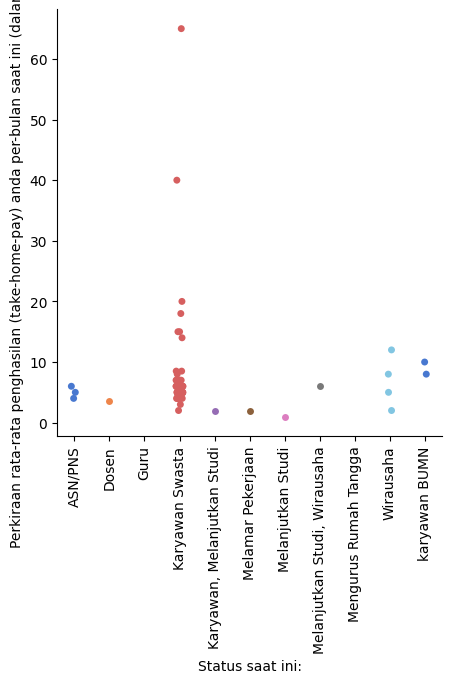

In [ ]:
p2 = sns.catplot(data=df, x='Status saat ini:',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')
plt.xticks(rotation = 90)

<ipython-input-48-60a75912d6a6>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  p3 =  sns.catplot(data=df, x='Waktu Mendapatkan Pekerjaan:',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '3-6 Bulan'),
  Text(1, 0, '6-12 bulan'),
  Text(2, 0, 'Belum mendapatkan pekerjaan'),
  Text(3, 0, 'Kurang dari 3 bulan.'),
  Text(4, 0, 'Tidak berencana mencari pekerjaan'),
  Text(5, 0, 'Wirausaha'),
  Text(6, 0, 'lebih dari 12 bulan.')])

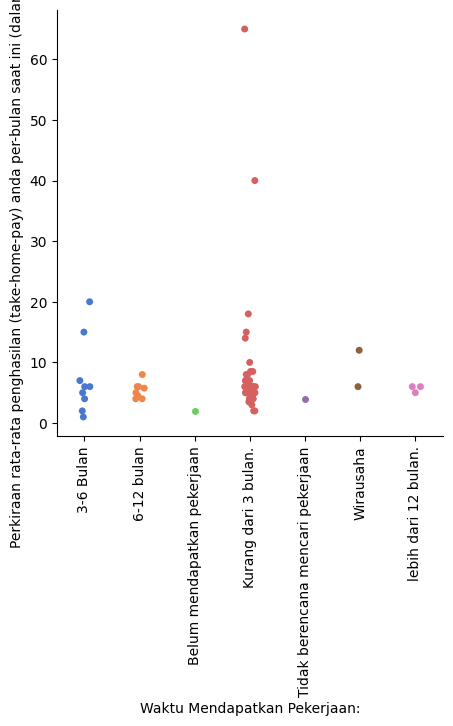

In [ ]:
p3 =  sns.catplot(data=df, x='Waktu Mendapatkan Pekerjaan:',y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', kind = 'strip', palette = 'muted')
plt.xticks(rotation = 90)

Terlihat bahwa terindikasi adanya asosiasi antara Status saat ini dengan waktu mendapatkan pekerjaan (dikarenakan saat di plot terhadap perkiraan rata-rata penghasilannya, memiliki bentuk plot yang mirip). Karena bukan merupakan variable numerik, akan diuji asosiasinya dengan crosstab dan dicek dengan menggunakan chi square

H0: Kedua variabel tidak saling berkaitan
H1: Kedua variabel saling berkaitan

In [ ]:
# Cross tabulation antara Status saat ini dan waktu mendapatkan pekerjaan
CrosstabResult=pd.crosstab(index=df['Status saat ini:'],columns=df['Waktu Mendapatkan Pekerjaan:'])
print(CrosstabResult)

Waktu Mendapatkan Pekerjaan:  3-6 Bulan  6-12 bulan  \
Status saat ini:                                      
ASN/PNS                               0           1   
Dosen                                 0           0   
Guru                                  0           0   
Karyawan Swasta                      12           7   
Karyawan, Melanjutkan Studi           0           0   
Melamar Pekerjaan                     0           0   
Melanjutkan Studi                     1           0   
Melanjutkan Studi, Wirausaha          0           0   
Mengurus Rumah Tangga                 0           0   
Wirausaha                             0           0   
karyawan BUMN                         0           1   

Waktu Mendapatkan Pekerjaan:  Belum mendapatkan pekerjaan  \
Status saat ini:                                            
ASN/PNS                                                 0   
Dosen                                                   0   
Guru                                    

In [ ]:
from scipy.stats import chi2_contingency

# Uji Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value adalah H0 probabilitas H0 benar
# Jika P-value < 0.05 (taraf 95%) maka H0 ditolak

print('P-Valuenya:', ChiSqResult[1])

P-Valuenya: 1.0971374597180914e-14


Karena P-valuenya sangat kecil, maka H0 ditolak, artinya kedua variabel tersebut saling berkaitan

## Insight 3
Hubungan antara Kesesuaian kurikulum dan Kesesuaian bidang ilmu terhadap rata-rata penghasilan

<Figure size 1200x600 with 0 Axes>

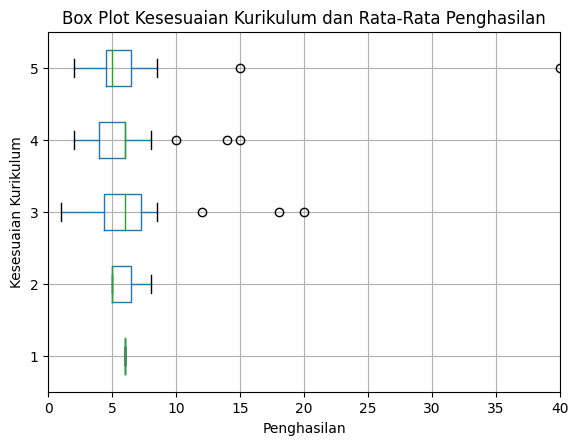

In [ ]:
# Membuat boxplot Kesesuaian Kurikulum terhadap rata-rata Penghasilan
plt.figure(figsize=(12,6))
boxplot = df.boxplot(column='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', by='Kesesuaian Kurikulum:', vert=False)
plt.title('Box Plot Kesesuaian Kurikulum dan Rata-Rata Penghasilan')
plt.suptitle('')
plt.ylabel('Kesesuaian Kurikulum')
plt.xlabel('Penghasilan')
plt.xlim(0,40)
plt.grid(True)
# outlier > 40 dihilangkan

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

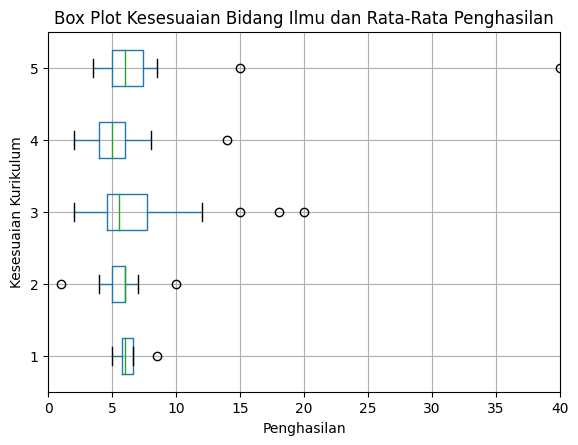

In [ ]:
# Membuat boxplot Kesesuaian Bidang Ilmu terhadap rata-rata Penghasilan
plt.figure(figsize=(12,6))
boxplot = df.boxplot(column='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', by='Kesesuaian Bidang Ilmu:', vert=False)
plt.title('Box Plot Kesesuaian Bidang Ilmu dan Rata-Rata Penghasilan')
plt.suptitle('')
plt.ylabel('Kesesuaian Bidang Ilmu')
plt.xlabel('Penghasilan')
plt.xlim(0,40)
plt.grid(True)
# outlier > 40 dihilangkan

# Show the plot
plt.show()

Berdasarkan plot correlation yang telah dibuat telah terindikasi juga adanya korelasi/asosiasi antara Kesesuaian Kurikulum dan Kesesuaian bidang Ilmu, dimana

In [ ]:
df["Kesesuaian Kurikulum:"].corr(df["Kesesuaian Bidang Ilmu:"])

0.6180888947825135

Yang mana korelasi tersebut cukup signifikan